# Population parameters estimations

### There are two types of estimates population parameter estimations:

- point estimators, where the estimate of the unknown parameter consists of a single value
- confidence interval , where we determine the interval in which the unknown value of the population parameter occurs with a predetermined probability


In [ ]:
library('dplyr')
library('ggplot2')

### 1) Point estimators for population parameters are:

|   |   |   |   | 
|---|---|---|---|
|  Population parameters | mean E(x), μ | probability  π | standard deviation  σ |   
|  Sample statistics | sampling average  x̄ |  proportion p = x/n |  sample std. deviation s  |  

![image](https://sixsigmastudyguide.com/wp-content/uploads/2020/04/standard-deviation-calculations.png)

## 2) Confidence Interval

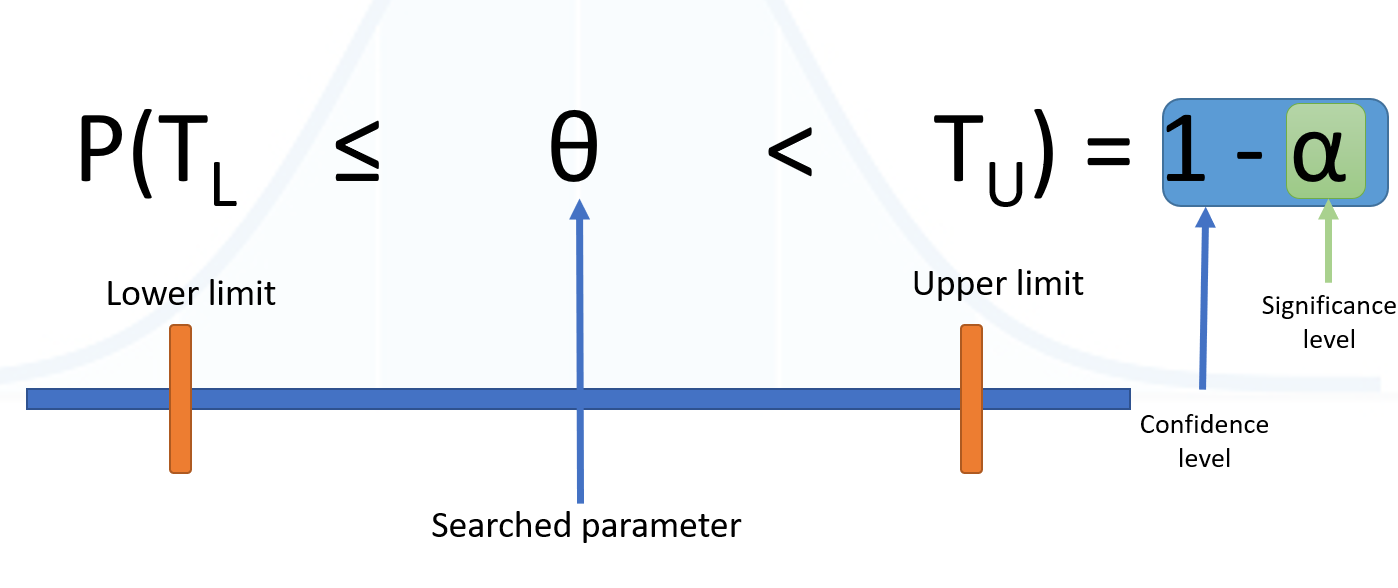

Searched parameter is θ, often we are searching for the population mean μ, estimated through the sample mean x̄. <br>
This means that if we would repeatedly sample from given population approximately 100(1 - α)% of interval estimations would contain the true value θ we are trying to approximate and 100.α% of interval estimation would not contain approximated parameter θ.

**Slovník:**<br>
Confidence interval = interval spolehlivosti / konfidenční interval <br>
Confidence level = koeficient spolehlivosti / konfidenční koeficient / spolehlivost odhadu<br> 
Significance level = hladina vyznamnosti <br>
Standard error of the mean = Střední chyba průměru

Example: <br>
We have decided to estimate the boiling point of the water at sea level. We assume that the measurements follows normal distribution.


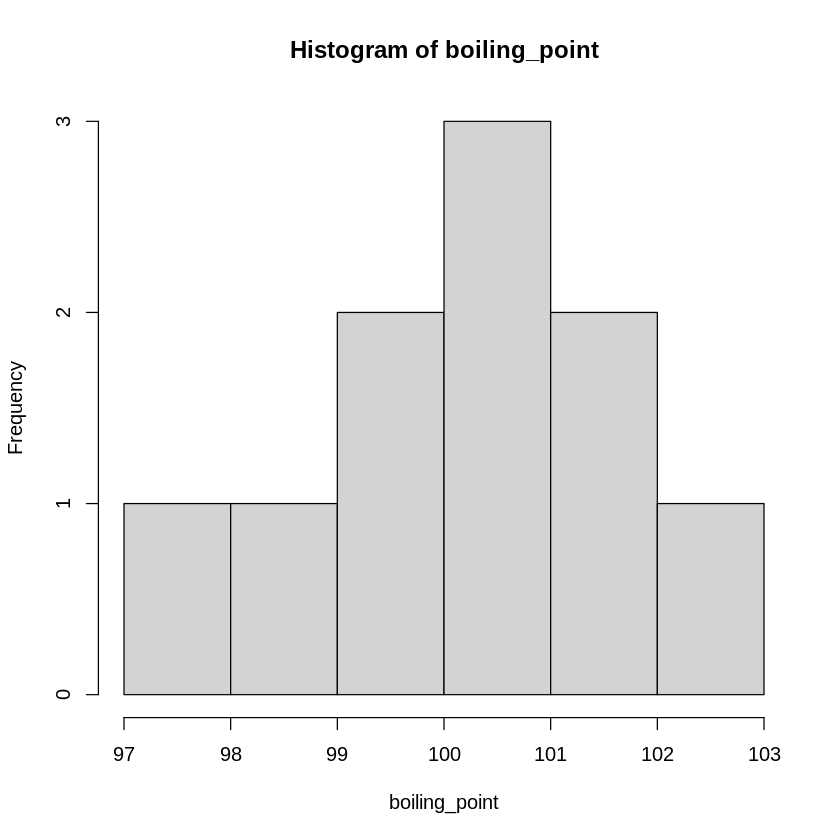

In [ ]:
boiling_point <- rnorm(10, mean=100, sd=1)
hist(boiling_point)

In [ ]:
# compute mean and sd
mean_bp <- mean(boiling_point)
sd_bp <- sd(boiling_point)
print(mean_bp)
print(sd_bp)
100 - mean_bp

[1] 100.0856
[1] 1.326971


[1] -0.08561302

In [ ]:
boiling_point_large <- rnorm(10000, mean=100, sd=1)

# compute mean and sd
mean_bp_large <- mean(boiling_point_large)
sd_bp_large <- sd(boiling_point_large)
print(mean_bp_large)
print(sd_bp_large)
100 - mean_bp_large

[1] 100.0007
[1] 1.002092


[1] -0.0006895067

## Standard error of the mean (SEM, SE)
Number that says how much estimated sample mean differs from population mean.
The larger the standard error of the mean, the larger the possible range in the values of the individual means. As the mean error of the mean changes, so will the size of the interval into which the sample means are likely to fall.

$
SE_{x̄} = \frac{σ}{\sqrt {n}}
$

In case of boiling water we know population standard deviation. Let's compute SE.

In [ ]:
SE_small = 1/sqrt(length(boiling_point))
SE_small

SE_large = 1/sqrt(length(boiling_point_large))
SE_large

[1] 0.3162278

[1] 0.01

As the size of the sample grows the SE is getting smaller. We may try to show it in a graph.

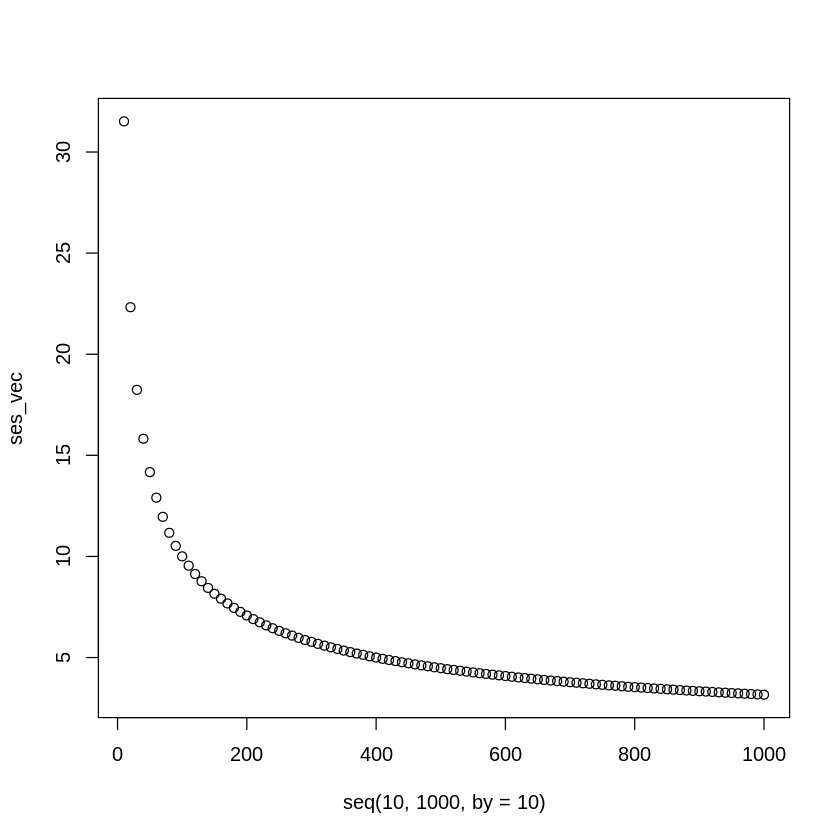

In [ ]:
ses_vec <- c()
for (i in seq(10, 1000, by=10)){
  se <- mean(rnorm(i, mean=100, sd=1))/sqrt(i)
  ses_vec <-c(ses_vec, se)
}

plot(seq(10, 1000, by=10), ses_vec)

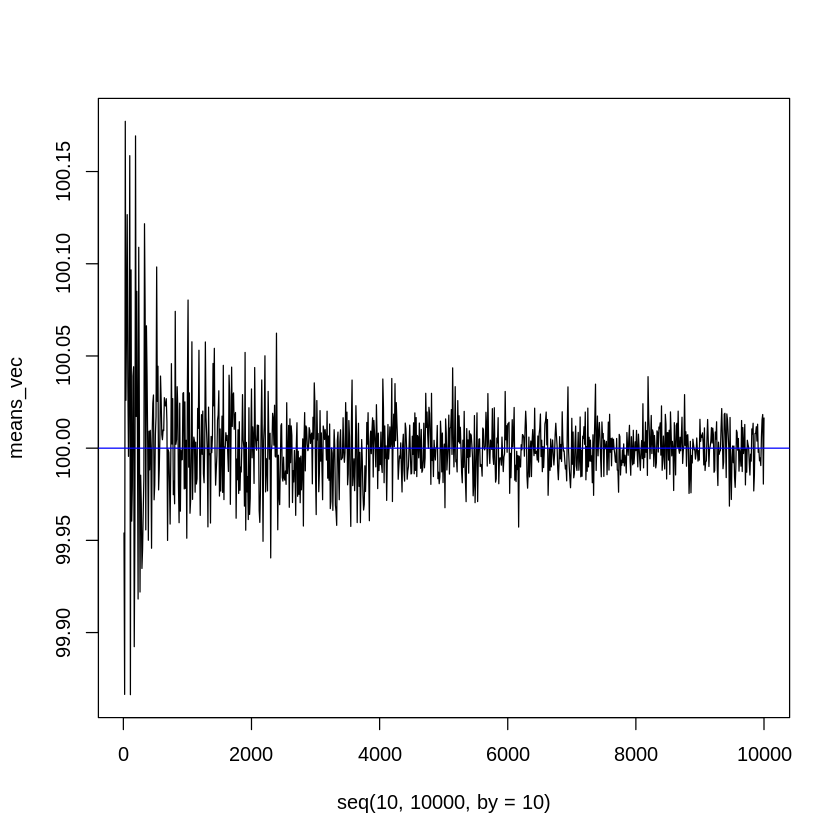

In [ ]:
means_vec <- c()
for (i in seq(10, 10000, by=10)){
  m <- mean(rnorm(i, mean=100, sd=1))
  means_vec <-c(means_vec, m)
}

plot(seq(10, 10000, by=10), means_vec, 'l')
abline(h=100, col='blue')

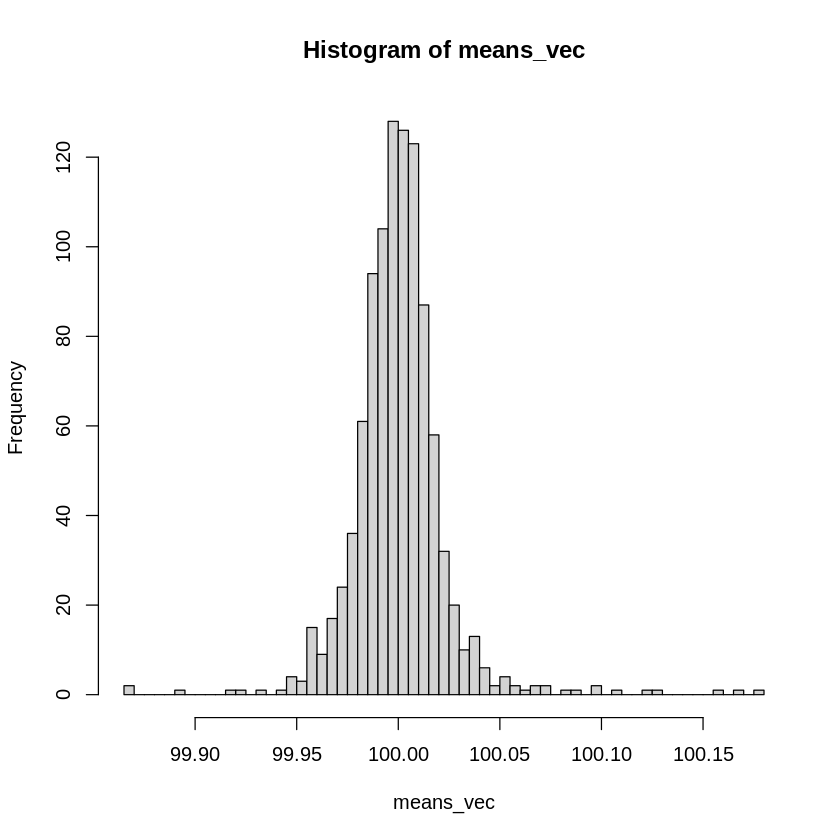

In [ ]:
# distribution of the sample mean
hist(means_vec, breaks=100)

### Central limit theorem<br>
From above example, where the searched parameter is population mean, we can see, that for large samples, the distribution of the sample means is approximately normally distributed with **a mean**:<br>
μ sample = μ population <br>
and **a standard deviation**: <br>
σ sample = σ population <br>




### Z Score
Z-score is a measure of how many standard deviations below or above the population mean a raw score is.

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/1920px-The_Normal_Distribution.svg.png)

| Confidence   Interval |  90%  |  95% |  99%  | 
|:---------------------:|:-----:|----:|:-----:|
|        Z Score        | 1.645 | 1.96 | 2.576 | 

### Probability Density Function
Probability density function can be used for specifying the probabily that the random variable will fall within a range of values.<br>


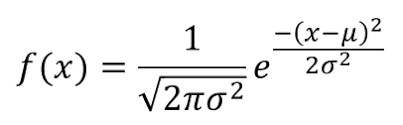

Let's assume standard normal distribution: μ = 0 and σ = 1

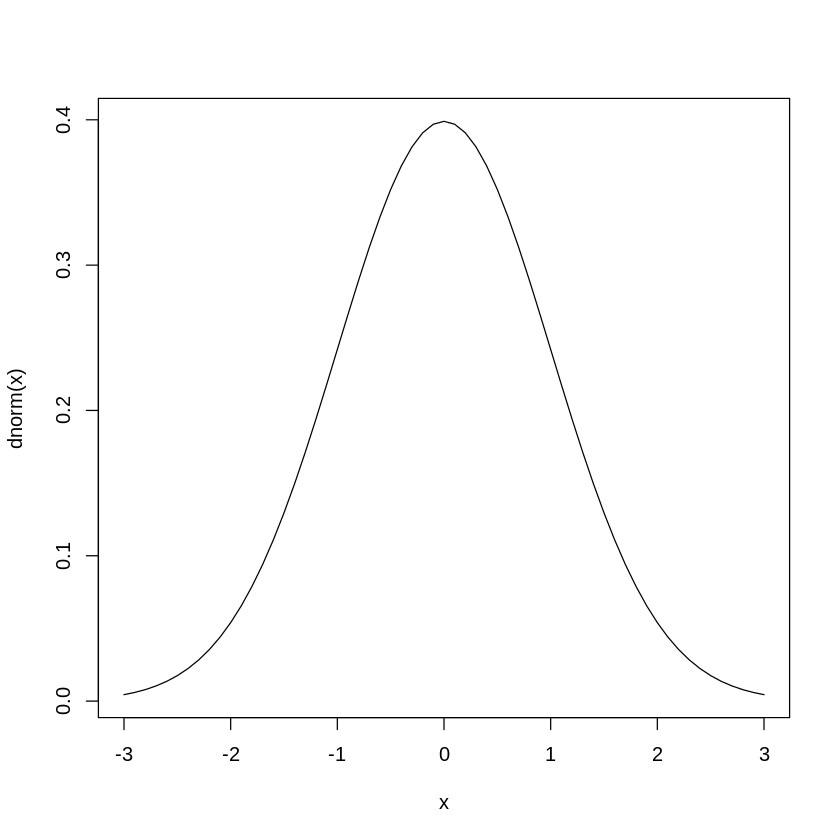

In [ ]:
# dnorm provides values of the probability density function for the normal distribution. 
x <- seq(-3, 3, 0.1) 
plot(x, dnorm(x), 'l')

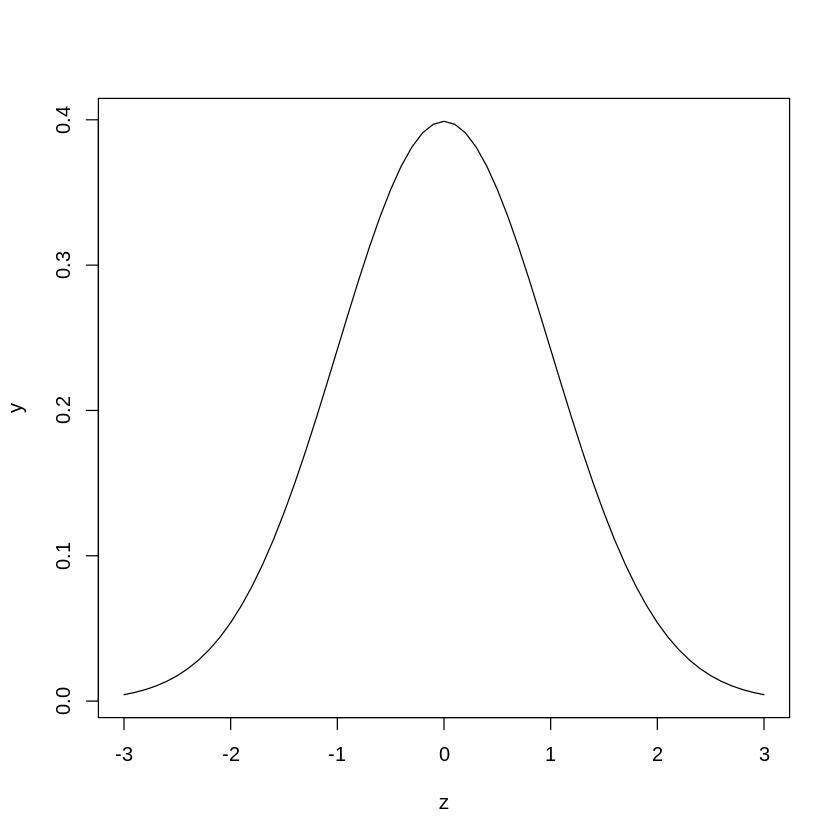

In [ ]:
# or we can use the equation
y = 1/sqrt(2*pi)*exp(-x^2/2)
plot(z, y, 'l')

The probability that a random variable value lies in a certain interval is given by the integral of the probability density between points a and b. <br>
$
P[a \leq X \leq b] = \int_a^b fx(x) \ dx 
$

Integrating probability distribution function will gives us **cumulative distribution function (CDF)**. The values in Z-score table is obtained through calculation of CDF with standard normal distribution parameters.<br>
$
\int_ {-\infty}^z  \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} \ dx 
$

In [ ]:
# let's define our PDF
my_pdf <- function(x){
  return (1/sqrt(2*pi)*exp(-x^2/2))
}

0.5 with absolute error < 4.7e-05

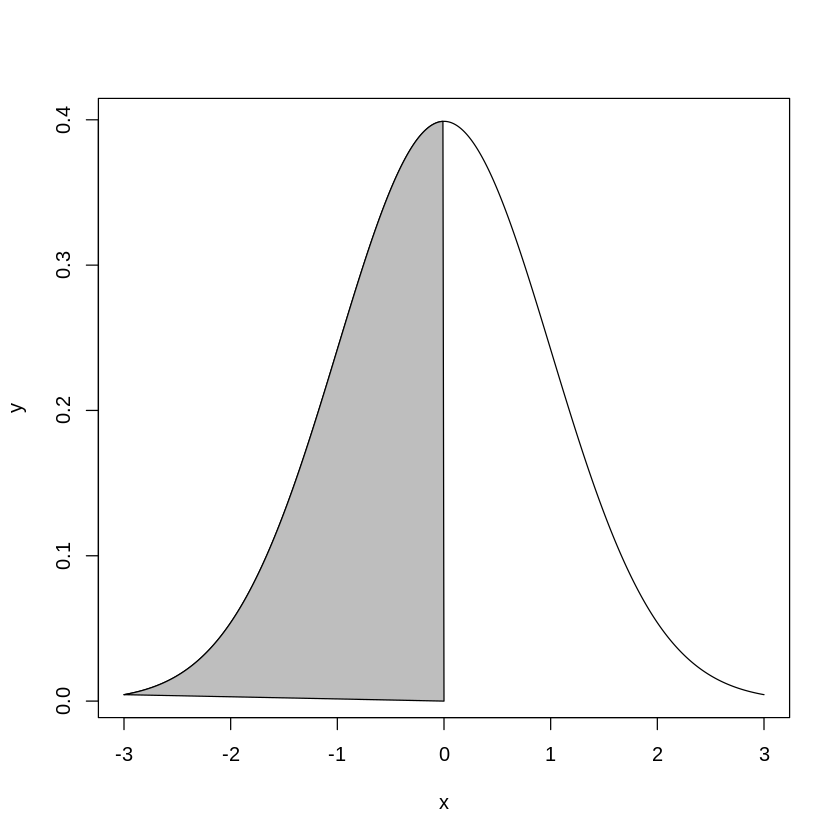

In [ ]:
integrate(my_pdf, -Inf, 0)

x <- seq(-3, 3, 0.01)
y <- dnorm(x) 

plot(x, y, 'l')
polygon(c(x[x < 0], 0, 0), 
        c(y[x < 0], 0, 0), col='gray' )

In [ ]:
# the same result we may obtain using pnorm function
pnorm(0, mean=0, sd=1)

[1] 0.5

In [ ]:
# Let's calculate z-scores table for one side interval and then we can compare with pre computed z-table


rows <- c(seq(0, 2.0, 0.1))
columns <- c(seq(0, 0.09, 0.01))

mat <- matrix(ncol=length(columns), nrow=length(rows))
for (i in (1:length(rows))){
  for (j in (1:length(columns))){
    z <- rows[i] + columns[j]
    mat[i, j] <- round(integrate(my_pdf, -Inf, z)$value, 4)
  }
}

z_table <- data.frame(mat)
colnames(z_table) <- columns
rownames(z_table) <- rows
z_table

,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.1,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.2,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.3,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.4,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.5,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.6,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.7,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.8,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133


### Intervals can be:
- one sided from the right
- one sided from the left
- both sided

## Confidence Intervals for Unknown Mean and Known Standard Deviation

With this knowledge we can try to compute 95% both sided confidence interval for our example with boiling point of water at sea level. Assuming standard deviation of one and 50 measurements.<br>
That means that our equation will be as follows:<br>
$
x̄ \pm z^*\frac{σ}{\sqrt{n}}
$
<br>
where z* is the upper (1-α)/2 critical value for the standard normal distribution.



We use these interval estimates not only in the cases,
when we know the standard deviation σ, but also when
we have a sufficiently large sample (n ≥ 30) and σ is uknown. In such cases
the standard deviation σ can be approximated by the sample standard deviation s without incurring
significant error.

R have for work with standart distribution following functions:
- rnorm
- pnorm
- dnorm
- qnorm

In [ ]:
# we don't have to use tables in r
lower_z <- qnorm(.025)
lower_z
upper_z <- qnorm(0.975)
upper_z

[1] -1.959964

[1] 1.959964

In [ ]:
n <- 50
sigma <- 1
samples <- rnorm(n, 100, sigma)
mean_samples <- mean(samples)
mean_samples

[1] 99.94783

In [ ]:
lower_boundary <- mean_samples - upper_z*sigma/sqrt(n)
lower_boundary
upper_boundary <- mean_samples + upper_z*sigma/sqrt(n)
upper_boundary

[1] 99.67065

[1] 100.225

## Confidence Intervals for Unknown Mean and Uknown Standard Deviation

Since the standard error is an estimate of the true value of the standard deviation, the distribution of the sample mean is no longer normal. The sampling mean follows a t distribution with mean and standard deviation. The distribution of t is described by degrees of freedom. For a sample of size n, the t-distribution will have n-1 degrees of freedom.<br>
Both sided interval is defined as follows:<br>
$
x̄ \pm t^*\frac{σ}{\sqrt{n}}
$

In [ ]:
# we will use r functions rt, dt, pt and qt for t-distribution

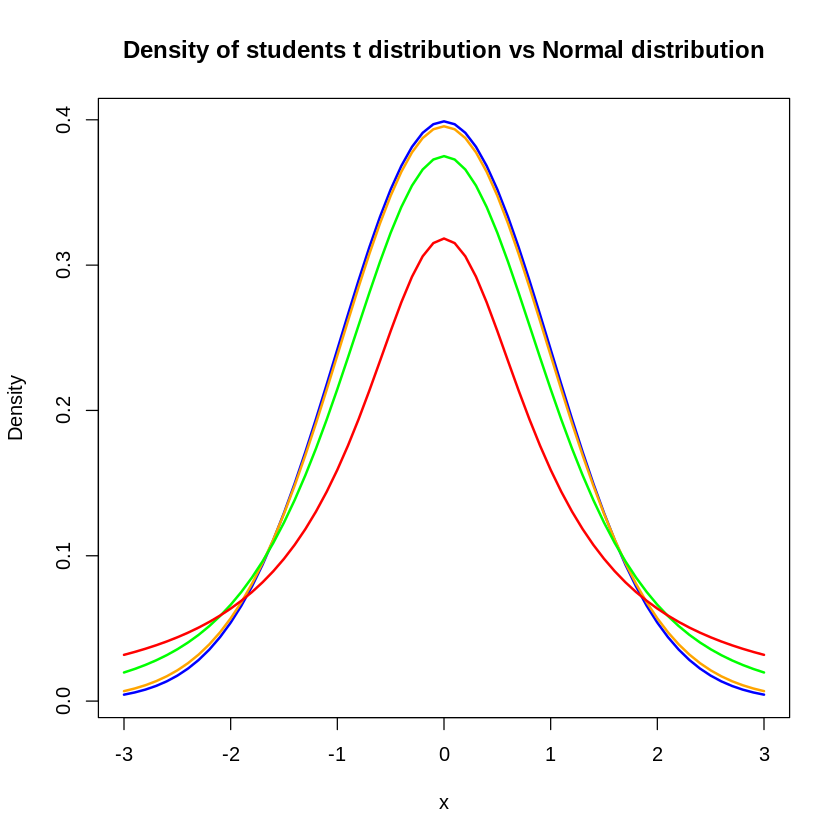

In [ ]:
# lets look at how different the probability density is
x <- seq(-3, 3, 0.1) 

plot(
    x, dnorm(x),
    col='blue', type = 'l', lwd=2, 
    main='Density of students t distribution vs Normal distribution',
    ylab='Density'
)
lines(x, dt(x, df=29), col='orange', lwd=2)
lines(x, dt(x, df=4), col='green', lwd=2)
lines(x, dt(x, df=1), col='red', lwd=2)

In [ ]:
# let's generate 10 measurements
n <- 10
sigma <- 1
samples <- rnorm(n, 100, sigma)
mean_samples <- mean(samples)
mean_samples

[1] 99.91432

In [ ]:
upper_t <- qt(0.975, df=n-1)
sample_sd <- sd(samples)
sample_sem <- sample_sd/sqrt(n)

t_lower_boundary <- mean_samples - upper_t*sample_sem
t_lower_boundary
t_upper_boundary <- mean_samples + upper_t*sample_sem
t_upper_boundary

[1] 99.15711

[1] 100.6715

### easy way to get confidence interval in r

In [ ]:
output <- t.test(samples, conf.level=0.95)
output$conf.int

[1]  99.15711 100.67152
attr(,"conf.level")
[1] 0.95